<a href="https://colab.research.google.com/github/zhrnnsw/PCVK_Ganjil_2023/blob/main/Kuis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Kelompok 3**



*   Alvian Nur Firdaus
*   Devi Andini Febrianti
*   Febrian Dani
*   Naresh Prasista
*   Zahra Annisa Wahono


# **Kuis 2**

1. Mengerjakan secara kelompok yang terdiri dari 5 anggota

2. Kumpulkan e-ktp anggota keluarga atau kelas pada kelompok minimal 5 buah sebagai dataset. 1 foto bisa berbagai pose ketika pengambilan foto e-ktp.

3. Deteksi dan kenali foto wajah e-ktp tersebut menggunakan metode yang telah dipelajari baik pada matakulilah PCVK ataupun matakuliah lain pada semester ini.

4. Presentasikan di depan kelas hasil dari pekerjaan kelompok Anda, paparkan hasil dari pekerjaan tersebut secara detail lengkap dengan tangkapan layar bagian dari; (1)pre-processing, (2)lokalisasi, (3)segmentasi, dan (4)pengenalan.

5. Jangan lupa upload juga kode program tersebut pada repository
kumpulkan link file presentasi dalam bentuk pdf dan link repository.

## **Prapemrosesan**

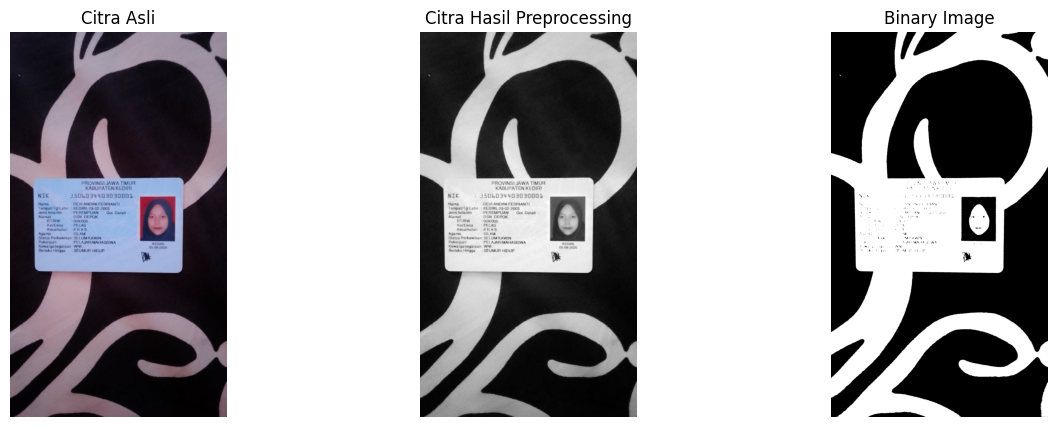

In [ ]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Membaca citra e-KTP
image = cv2.imread("/content/drive/MyDrive/ktp_kel3/ktp1.jpg")


# Konversi ke format grayscale
preprocessed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Pengurangan noise
preprocessed_image = cv2.GaussianBlur(preprocessed_image, (3, 3), 0)

# Metode adaptif thresholding untuk lokalisasi
_, binary_image = cv2.threshold(preprocessed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Temukan kontur dalam citra biner
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada citra asli
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Citra Asli")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Citra Hasil Preprocessing")
plt.imshow(preprocessed_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Binary Image")
plt.imshow(binary_image, cmap="gray")
plt.axis("off")



plt.show()

## **Lokalisasi**

(-0.5, 2339.5, 4159.5, -0.5)

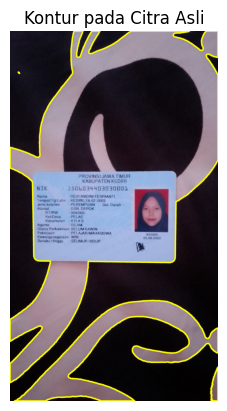

In [ ]:
# Temukan kontur dalam citra biner
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contours = imutils.grab_contours(contours)

# Gambar kontur pada citra asli
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 255), 15)

plt.subplot(1, 1, 1)
plt.title("Kontur pada Citra Asli")
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

Jumlah Wajah Terdeteksi: 1


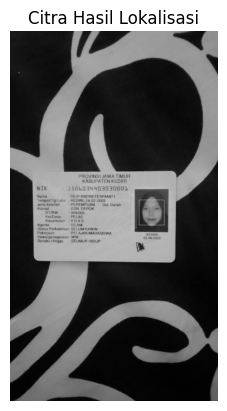

In [ ]:
# Inisialisasi detector
detector = cv2.CascadeClassifier("/content/drive/MyDrive/Semester 5/PCVK/Images/haarcascades/haarcascade_frontalface_default.xml")

# Deteksi wajah
faces = detector.detectMultiScale(
    preprocessed_image,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags=cv2.CASCADE_SCALE_IMAGE
)

# Cetak jumlah wajah yang terdeteksi
print("Jumlah Wajah Terdeteksi:", len(faces))

# Gambar kotak di sekitar wajah
for (x, y, w, h) in faces:
    kotak = cv2.rectangle(preprocessed_image, (x, y), (x+w, y+h), (255, 0, 0), 2)

img_kotak = cv2.cvtColor(kotak, cv2.COLOR_BGRA2RGB)

plt.title("Citra Hasil Lokalisasi")
plt.imshow(img_kotak)
plt.axis("off")


plt.show()

## **Segmentasi**

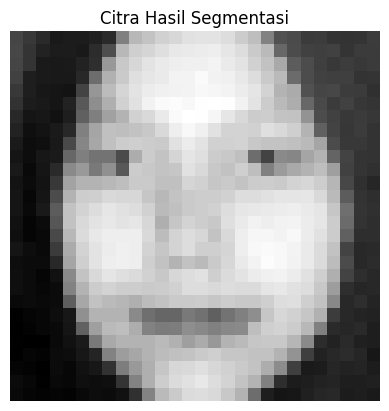

In [ ]:
# Segmentasi wajah

# Find the largest face
largest_face = max(faces, key=lambda face: face[2] * face[3])

# Segment the largest face
(x, y, w, h) = largest_face
wajah_roi = preprocessed_image[y:y+h, x:x+w]
# Resize gambar wajah ke ukuran 28x28
wajah = cv2.resize(wajah_roi, (28, 28))

plt.title("Citra Hasil Segmentasi")
plt.imshow(wajah, cmap="gray")
plt.axis("off")

plt.show()

## **Pengenalan**

In [ ]:
import cv2
import os
import numpy as np

# Function to get names (without "absen_") and labels from the dataset directory
def get_images_and_labels(dataset_path):
    image_paths = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path)]
    face_samples = []
    labels = []

    for image_path in image_paths:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Resize the image to 28x28 pixels
        img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_CUBIC)

        face_samples.append(img)

        # Get label from the file name (without "absen_" and extension)
        label = os.path.basename(image_path).split(".")[0].replace("absen_", "")
        labels.append(label)

    return np.array(labels), face_samples

# Specify the dataset directory
dataset_path = "/content/drive/MyDrive/Semester 5/PCVK/Dataset/Dataset Model/"

# Get names and labels from the dataset
labels, faces = get_images_and_labels(dataset_path)

# Create LBPH model object
model = cv2.face.LBPHFaceRecognizer_create()

# Convert labels to numeric IDs
label_dict = {label: idx for idx, label in enumerate(np.unique(labels))}
ids = np.array([label_dict[label] for label in labels])

# Train the model with the available data
model.train(faces, ids)

# Save the model to an XML file
model.save("model.xml")

# Evaluate the model
correct = 0
total = len(faces)
for i in range(total):
    pred_label, _ = model.predict(faces[i])
    if pred_label == ids[i]:
        correct += 1

accuracy = correct / total
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [ ]:
print(label_dict)

{'Alvian Nur Firdaus': 0, 'Devi Andini Febrianti': 1, 'Febrian Dani': 2, 'Naresh Pratista': 3, 'Zahra Annisa Wahono': 4}


In [ ]:
# Membaca model CNN
model = cv2.face.LBPHFaceRecognizer_create()
model.read("model.xml")


# Prediksi nama pemilik wajah
label, confidence = model.predict(wajah)

print(label)
print("Nama: ", label)
print("Confidence: ", confidence)


1
Nama:  1
Confidence:  132.83630391905734
